<a href="https://colab.research.google.com/github/CrazyAncestor/Data-Analysis-in-Astronomy-2021/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4 (Data analysis in astronomy)
# Building a simple machine learning algorithm
# Have fun!!!

### Your name:
### Deadline 12/24 11:59 pm


### Introduction: in this homework, we are going to use PCA, logistic regression, SVM, decision tree and random forest to build models to predict the numbers shown on the images. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as ss
from sklearn.decomposition import PCA
import astropy.io.fits as pf

In [ ]:
### 1. We will use 
### training data set https://www.dropbox.com/s/43coge30onvdkl2/Training.fits?dl=0
### test data set https://www.dropbox.com/s/2ex0l7ncwgpbq75/Test.fits?dl=0

In [ ]:
training = pf.open('Training.fits')
### training[0].data -> images
### training[1].data -> number labels

In [ ]:
X_train = training[0].data
y_train = training[1].data
test = pf.open('Test.fits')

X_test = test[0].data
y_test = test[1].data

### Simple illustration

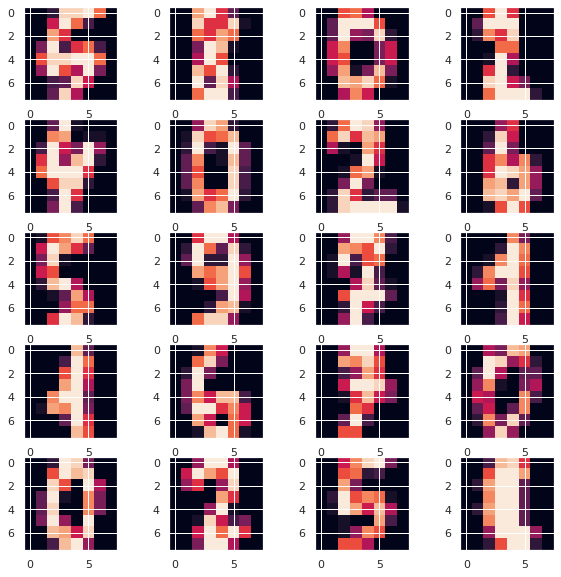

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(X_train[i*50].reshape(8,8))

### Two weeks ago, we learned that we can use PCA to obtain the coefficients

In [ ]:
pca = PCA(30)
pca.fit(X_train)
coeff = pca.transform(X_train)
print('Total variance explained by the eigenimages:%0.2f' % np.sum(pca.explained_variance_ratio_))

Total variance explained by the eigenimages:0.96


### from the distribution of the coeff [0,1], we noticed that different numbers have different coefficients. This means that we can use the coefficients to distinguish the numbers. 

Text(0, 0.5, 'Coeff 1')

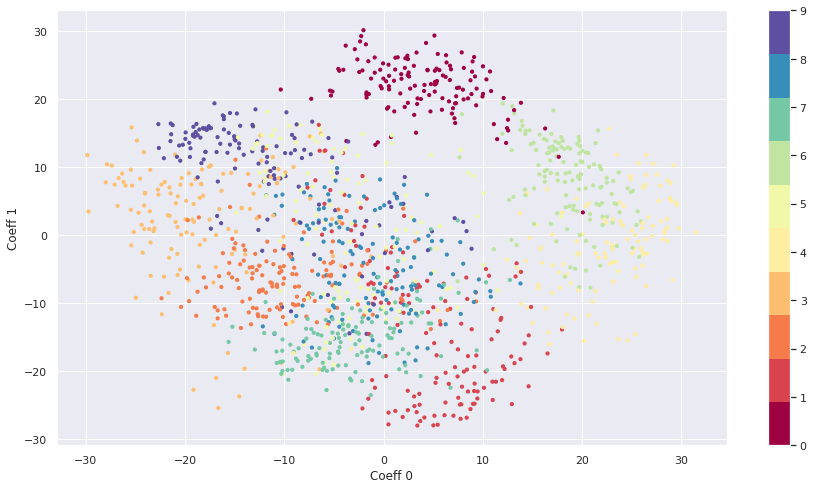

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(coeff[:,0],coeff[:,1],c=y_train,cmap=plt.cm.get_cmap('Spectral', 10),s=10)
plt.colorbar()
plt.xlabel('Coeff 0')
plt.ylabel('Coeff 1')

### Now, Let us start with using logistic regression to do the classification. 
### Here we first use the first two coefficients 


In [ ]:
import sklearn.linear_model as sl
import sklearn.metrics as sm
import sklearn.svm as ss

In [ ]:
lr = sl.LogisticRegression(max_iter=1000000)
lr.fit(coeff[:,:2],y_train)
number_pred = lr.predict(coeff[:,:2])

### We are going to use "accuracy_score" as our metric this time (Check the accruracy score document for its definitation)

In [ ]:
print('Accuracy_score')
print(sm.accuracy_score(y_train,number_pred))
#print(sm.accuracy_score(y_test,test_pred))

Accuracy_score
0.6013363028953229


### The color code shows the prediction results

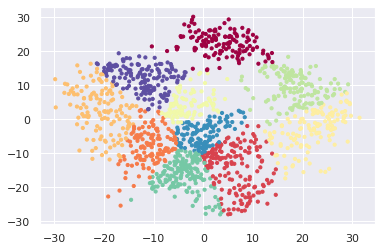

In [ ]:
plt.scatter(coeff[:,0],coeff[:,1],c=number_pred,cmap=plt.cm.get_cmap('Spectral', 10),s=10)

### To do:
### 1. Write a code to do "for loop" to increase the number of coefficients used in the training and 
### plot x-axis (Number of coefficients) and y-axis (accuracy score) 
### [15 points] 

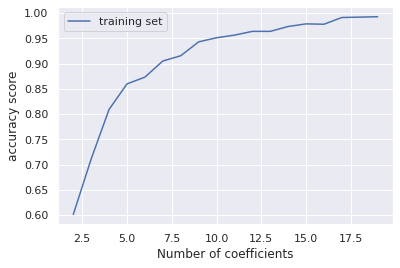

In [ ]:
n_coeff = np.arange(2,20)
score_train = []

for i in range(len(n_coeff)):
  n = n_coeff[i]

  pca = PCA(30)
  pca.fit(X_train)
  coeff = pca.transform(X_train)

  lr = sl.LogisticRegression(max_iter=1000000)
  lr.fit(coeff[:,:n],y_train)
  pred_train = lr.predict(coeff[:,:n])
  score_train.append(sm.accuracy_score(y_train,pred_train))

plt.plot(n_coeff,score_train,label='training set')

plt.xlabel('Number of coefficients')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

### 2. Apply the method to test data set, produce the same plot x-axis (Number of coefficients) and y-axis (accuracy score), 
# Showing the accuracy score from the training dataset and the test dataset in the same plot. 
### [15 points]

### Hint: in order to get the coefficients for the test dataset, you can directly do "coeff_test = pca.transform(X_test)"

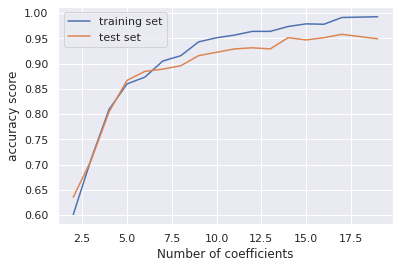

In [ ]:
n_coeff = np.arange(2,20)
score_train = []
score_test = []
for i in range(len(n_coeff)):
  n = n_coeff[i]

  pca = PCA(30)
  pca.fit(X_train)
  coeff = pca.transform(X_train)

  lr = sl.LogisticRegression(max_iter=1000000)
  lr.fit(coeff[:,:n],y_train)
  pred_train = lr.predict(coeff[:,:n])
  score_train.append(sm.accuracy_score(y_train,pred_train))

  coeff = pca.transform(X_test)
  pred_test = lr.predict(coeff[:,:n])
  score_test.append(sm.accuracy_score(y_test,pred_test))
plt.plot(n_coeff,score_train,label='training set')
plt.plot(n_coeff,score_test,label='test set')
plt.xlabel('Number of coefficients')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

### 3. Observe the two curves and answer the following questions:
### a. At which point the model starts to overfit the training dataset. 
### b. What is the best accuracy score we can get by using a logistic regression model. 
### [10 points]

a. At about num_of_coeff = 7, the accuracy score of training set begins to be greater than that of test set, which indicates an overfitting in the training set.

To avoid overfitting, we must restrict num_of_coeff to be no greater than 6, and thus accuracy score can be no better than 0.88.

### We now use support vector machines to do the classification

### 4. Use linear SVM and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training. 
### Again produce the plot with the two curves. 
### [15 points]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

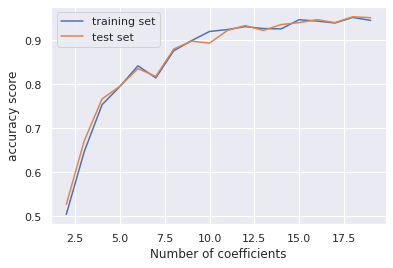

In [ ]:
n_coeff = np.arange(2,20)
score_train_LinearSVM = []
score_test_LinearSVM = []
for i in range(len(n_coeff)):
  n = n_coeff[i]

  pca = PCA(30)
  pca.fit(X_train)
  coeff = pca.transform(X_train)

  linear_svm = ss.LinearSVC()
  linear_svm.fit(coeff[:,:n],y_train)
  pred_train = linear_svm.predict(coeff[:,:n])
  score_train_LinearSVM.append(sm.accuracy_score(y_train,pred_train))

  coeff = pca.transform(X_test)
  pred_test = linear_svm.predict(coeff[:,:n])
  score_test_LinearSVM.append(sm.accuracy_score(y_test,pred_test))
plt.plot(n_coeff,score_train_LinearSVM,label='training set')
plt.plot(n_coeff,score_test_LinearSVM,label='test set')
plt.xlabel('Number of coefficients')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

### 5. Use KERNEL SVM and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training. 
# You can explore the parameters 
### Again produce the plot with the two curves.
### [15 points]

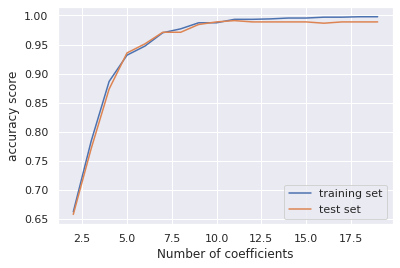

In [ ]:
n_coeff = np.arange(2,20)
score_train_KernelSVM = []
score_test_KernelSVM = []
for i in range(len(n_coeff)):
  n = n_coeff[i]

  pca = PCA(30)
  pca.fit(X_train)
  coeff = pca.transform(X_train)

  svm = ss.SVC(kernel='rbf')
  svm.fit(coeff[:,:n],y_train)
  pred_train = svm.predict(coeff[:,:n])
  score_train_KernelSVM.append(sm.accuracy_score(y_train,pred_train))

  coeff = pca.transform(X_test)
  pred_test = svm.predict(coeff[:,:n])
  score_test_KernelSVM.append(sm.accuracy_score(y_test,pred_test))
plt.plot(n_coeff,score_train_KernelSVM,label='training set')
plt.plot(n_coeff,score_test_KernelSVM,label='test set')
plt.xlabel('Number of coefficients')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

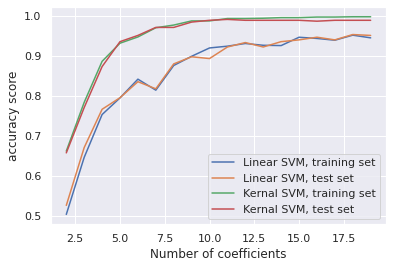

In [ ]:
plt.plot(n_coeff,score_train_LinearSVM,label='Linear SVM, training set')
plt.plot(n_coeff,score_test_LinearSVM,label='Linear SVM, test set')
plt.plot(n_coeff,score_train_KernelSVM,label='Kernal SVM, training set')
plt.plot(n_coeff,score_test_KernelSVM,label='Kernal SVM, test set')
plt.xlabel('Number of coefficients')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

### 6. What is the best accuracy score you can get for the test data set with SVM (both linear and Kernel)?
### [5 points]

From the overplotting of both linear and kernal SVM's accuracy score, we can see that kernal SVM obviously outperforms linear SVM, for kernal SVM can converge to an accuracy score of nearly 1.0, but linear SVM can only converge to about 0.95.

### Finally, We use random forest to do the classification. 
### 7. Use Random forest and do the same analysis to obtain the accuracy score of the training dataset and the test data as a function of number of coefficients used in the training. 
# You can explore the parameters 
### Again produce the plot with the two curves. 
### [15 points]

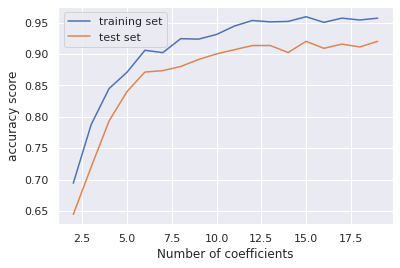

In [ ]:
import sklearn.ensemble as se 
n_coeff = np.arange(2,20)
score_train_LinearSVM = []
score_test_LinearSVM = []
for i in range(len(n_coeff)):
  n = n_coeff[i]

  pca = PCA(30)
  pca.fit(X_train)
  coeff = pca.transform(X_train)

  rf = se.RandomForestClassifier(criterion='entropy',max_depth=5,n_estimators=100)
  rf.fit(coeff[:,:n],y_train)
  pred_train = rf.predict(coeff[:,:n])
  score_train_LinearSVM.append(sm.accuracy_score(y_train,pred_train))

  coeff = pca.transform(X_test)
  pred_test = rf.predict(coeff[:,:n])
  score_test_LinearSVM.append(sm.accuracy_score(y_test,pred_test))
plt.plot(n_coeff,score_train_LinearSVM,label='training set')
plt.plot(n_coeff,score_test_LinearSVM,label='test set')
plt.xlabel('Number of coefficients')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

### 8. (a.) Print the feature importance, and tell me which feature is the most important. 
### (b.) What is the best accuracy score you can get for the test data set with Random forest method.

### [5 points]

(a) Feature 0 is the most important feature.

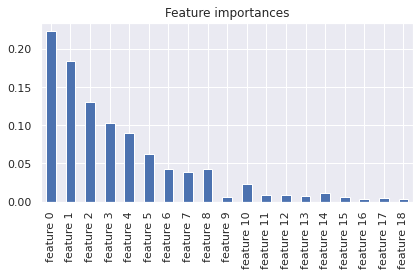

In [ ]:
import pandas as pd
importances = rf.feature_importances_
feature_names = [f"feature {i}" for i in range(len(importances))]
forest_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")

fig.tight_layout()

(b) The best test set score is about 0.92.

### 9. Compare the best accuracy scores from logistic regression, SVM, random forest and tell me
### which model works the best? 

### [5 points]


We can see that SVM, particularly kernal SVM has done the best, since there kernal SVM can nearly a perfect score of 1.0, and there are no obvious overfitting problem in both linear an kernal SVM if you increase the number of coefficients.
And the in logistic regression and random forest, there always exist problem of overfitting, and their accuracy score can be no better than 0.92.
